In [1]:
#Ahora veremos el modulo de Analisis Bivariado
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import empiricaldist
import scipy
import statsmodels.formula.api as smf

In [2]:
datosEnBruto= pd.read_csv("Encuesta de Remuneracion salarial Argentina.csv")

In [3]:
# Eliminemos los datos nulos por columna
datos =(
    datosEnBruto
    .dropna(axis=1)
)

In [4]:
for indice, valor in datosEnBruto['tengo_edad'].items():
    try:
        datosEnBruto.at[indice, 'tengo_edad'] = int(valor)
    except ValueError:
        print(f"El valor en la fila {indice} no se puede, dice: ",valor)
#Se agrego por que a menos que sean vampiros o entidades, no pueden tener esa edad.
    if valor >=120 or valor<15:
        datos = datos.drop(indice)

In [5]:
datos.head(5)

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2022,en_que_mes_fue_el_ultimo_ajuste,como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior,...,lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual,cantidad_de_personas_en_tu_organizacion,modalidad_de_trabajo,si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina,la_recomendas_como_un_buen_lugar_para_trabajar,salir_o_seguir_contestando,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority
0,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),475480.0,Menos de un sueldo,Dolar MEP,Uno,Noviembre,3,...,"Go, SQL",Más de 10000 personas,100% remoto,0,10,Terminar encuesta,25,Varón Cis,False,Semi-Senior
1,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000.0,No,No recibo bono,Tres,Octubre,3,...,Javascript,Más de 10000 personas,100% remoto,0,8,Terminar encuesta,27,Mujer Cis,False,Junior
2,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350.0,No,No recibo bono,Uno,Diciembre,3,...,".NET, Bash/Shell, TypeScript",De 201 a 500 personas,Híbrido (presencial y remoto),1,8,Terminar encuesta,21,Varón Cis,False,Junior
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),339000.0,Un sueldo,Performance individual,Tres,Noviembre,2,...,"Java, Javascript, Python, SQL",De 101 a 200 personas,100% remoto,0,8,Responder sobre guardias,25,Varón Cis,False,Semi-Senior
4,Argentina,Río Negro,Full-Time,Staff (planta permanente),380000.0,Un sueldo,Performance individual,Uno,Septiembre,4,...,"CSS, HTML, Javascript",Más de 10000 personas,100% remoto,0,10,Terminar encuesta,24,Varón Cis,True,Junior


In [15]:
model1 = (smf.ols(
        formula='tengo_edad ~  la_recomendas_como_un_buen_lugar_para_trabajar',
        data=datos
    )
    .fit()
)

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tengo_edad   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     88.50
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           7.16e-21
Time:                        17:34:41   Log-Likelihood:                -20000.
No. Observations:                5759   AIC:                         4.000e+04
Df Residuals:                    5757   BIC:                         4.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         35.5976      0.266    133.663      0.000      35.075      36.120
la_recomendas_como_un_buen_lugar_para_trabajar    -0.3432      0.036     -9.408      0.000      -0.415      -0.272
==============================================================================
Omnibus:                      440.542   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.844
Skew:                           0.730   Prob(JB):                    2.96e-119
Kurtosis:                       3.380   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
datos=(
    datos
    .assign(
        dedicacion= lambda df : df.dedicacion.replace(['Full-Time','Part-Time'],[1,0])
    )
)
#Le agregamos la variable categorica para evaluar en el modelo

In [6]:
model2 = (smf.ols(
        formula='tengo_edad ~ anos_de_experiencia + dedicacion',
        data=datos
    )
    .fit()
)

In [7]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tengo_edad   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     3278.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:35:05   Log-Likelihood:                -17854.
No. Observations:                5759   AIC:                         3.571e+04
Df Residuals:                    5756   BIC:                         3.573e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  27.5841      0.103    268.357      0.000      27.383      27.786
dedicacion[T.Part-Time]    -1.0439      0.331     -3.156      0.002      -1.692      -0.395
anos_de_experiencia         0.8078      0.010     80.424      0.000       0.788       0.827
==============================================================================
Omnibus:                     1096.615   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2195.499
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       4.986   Cond. No.                         47.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model3 = (smf.ols(
        formula='tengo_edad ~ antigüedad_en_la_empresa_actual + tiempo_en_el_puesto_actual',
        data=datos
    )
    .fit()
)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tengo_edad   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     672.8
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          2.62e-263
Time:                        17:34:45   Log-Likelihood:                -19439.
No. Observations:                5759   AIC:                         3.888e+04
Df Residuals:                    5756   BIC:                         3.890e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          31.0166      0.112    277.161      0.000      30.797      31.236
antigüedad_en_la_empresa_actual     0.7636      0.021     36.229      0.000       0.722       0.805
tiempo_en_el_puesto_actual          0.0012      0.004      0.328      0.743      -0.006       0.008
==============================================================================
Omnibus:                      652.789   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1041.137
Skew:                           0.807   Prob(JB):                    8.32e-227
Kurtosis:                       4.316   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#validacion del analisis de regresion multiple
resultadosModelos = pd.DataFrame(
    dict(
        valorActual= datos.tengo_edad,
        prediccionM1= model1.predict(),
        prediccionM2= model2.predict(),
        prediccionM3= model3.predict(),
        seniority= datos.seniority
    )
)
resultadosModelos

,valorActual,prediccionM1,prediccionM2,prediccionM3,seniority
0,25,32.165916,30.007392,31.016569,Semi-Senior
1,27,32.852245,29.199631,31.781367,Junior
2,21,32.852245,27.584108,31.016569,Junior
3,25,32.852245,30.007392,31.781367,Semi-Senior
4,24,32.165916,27.584108,31.016569,Junior
...,...,...,...,...,...
5759,39,33.195409,42.123815,32.546165,Senior
5760,40,33.881738,41.316053,40.183727,Senior
5761,21,35.597559,32.194549,36.370152,Senior
5762,29,33.195409,30.815154,33.310962,Semi-Senior


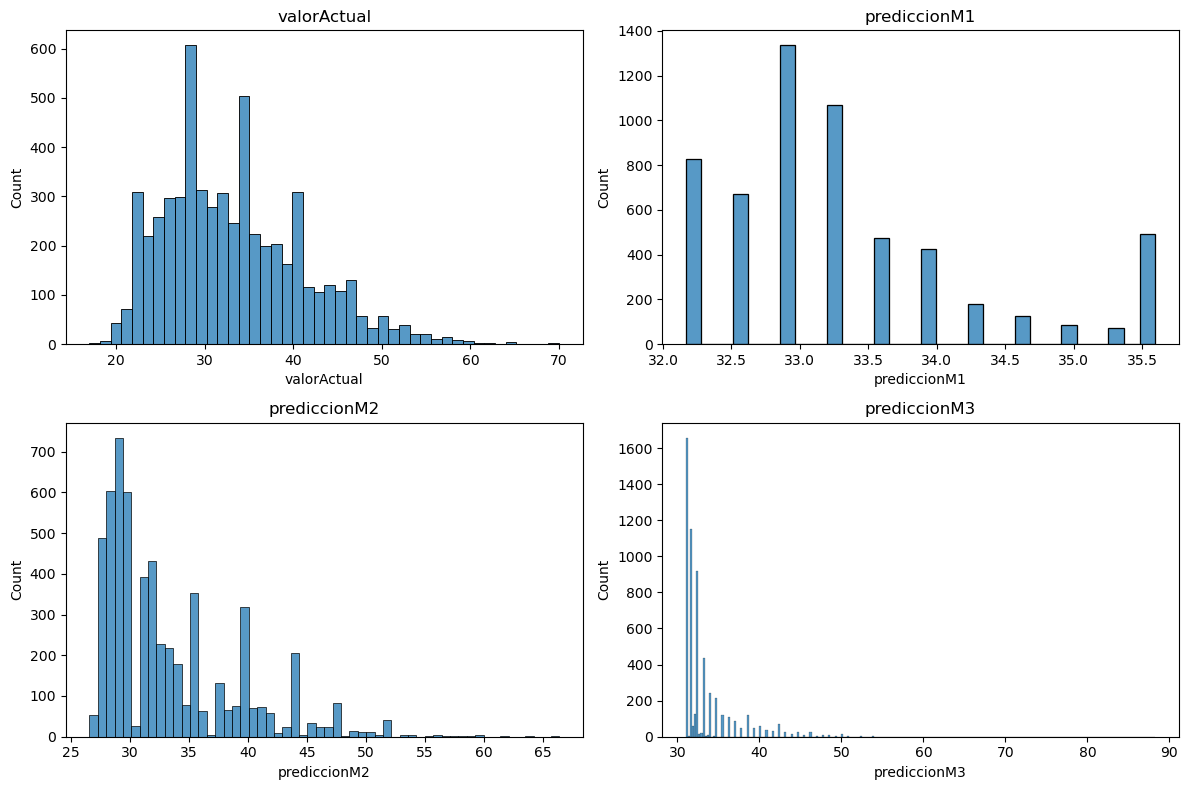

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=resultadosModelos, x='valorActual', ax=axes[0, 0])
axes[0, 0].set_title('valorActual')
sns.histplot(data=resultadosModelos, x='prediccionM1', ax=axes[0, 1])
axes[0, 1].set_title('prediccionM1')
sns.histplot(data=resultadosModelos, x='prediccionM2', ax=axes[1, 0])
axes[1, 0].set_title('prediccionM2')
sns.histplot(data=resultadosModelos, x='prediccionM3', ax=axes[1, 1])
axes[1, 1].set_title('prediccionM3')
plt.tight_layout()


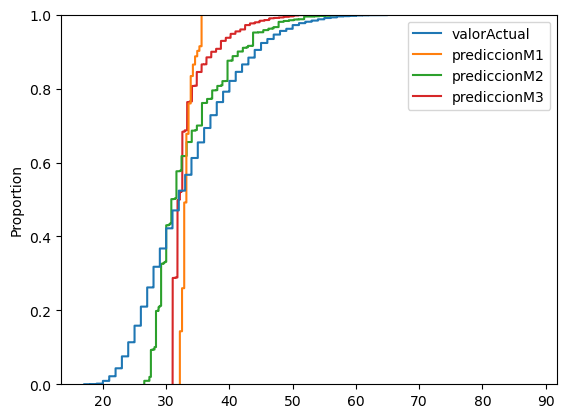

In [23]:
#Aplicando lo anterior
sns.ecdfplot(
    data=resultadosModelos
);

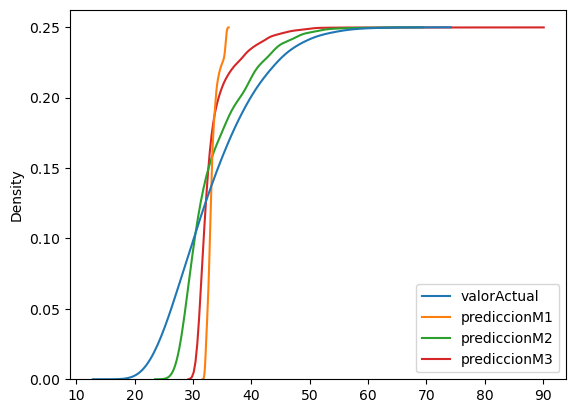

In [24]:
#PDFs
sns.kdeplot(
    data=resultadosModelos,
    cumulative=True
);

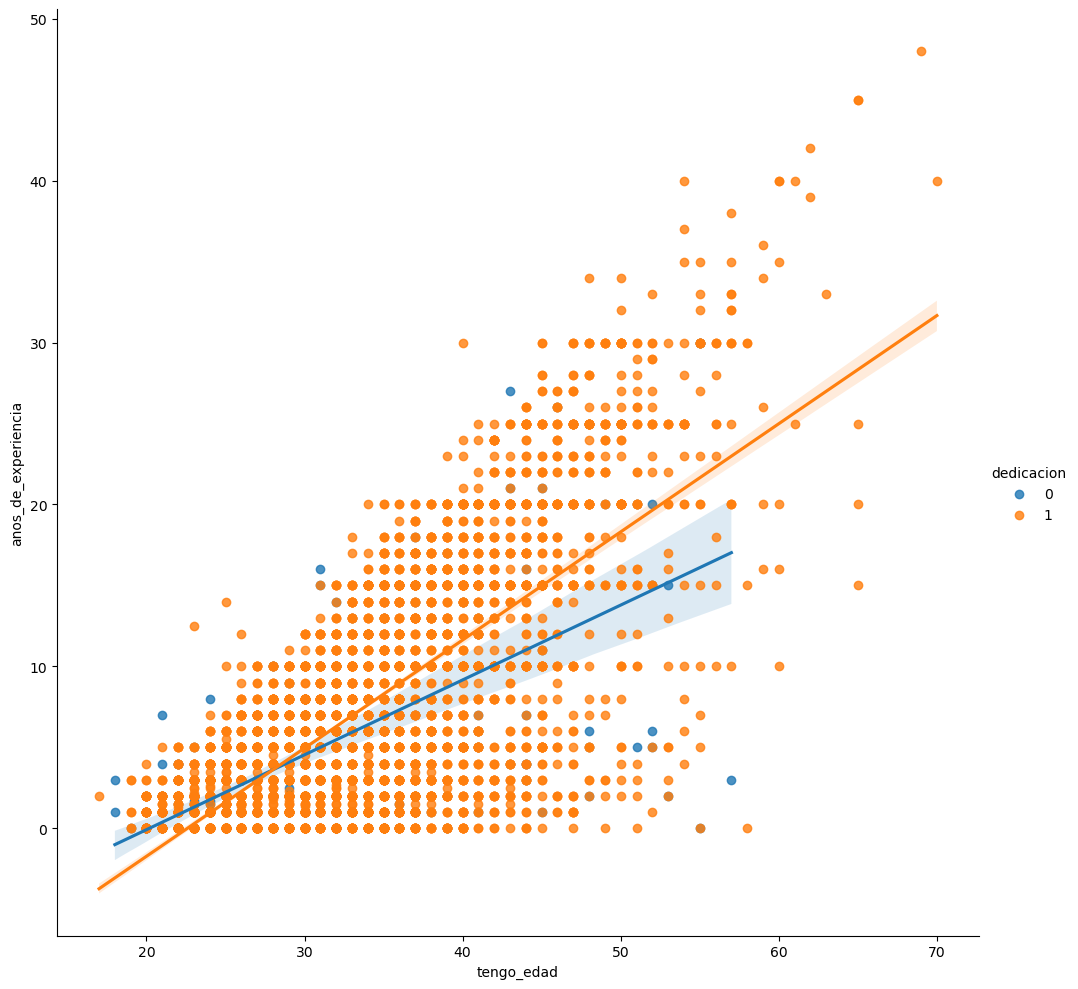

In [25]:
#Como pudimos haber encontrado antes 
sns.lmplot(
    data=datos,
    x='tengo_edad',
    y='anos_de_experiencia',
    hue='dedicacion',
    height=10
);

In [32]:
#Ahora veremos el analisis de regresion logistica
smf.logit(
    formula = 'dedicacion ~ tengo_edad + anos_de_experiencia +antigüedad_en_la_empresa_actual + seniority',
    data= datos
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.185987
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             dedicacion   No. Observations:                 5759
Model:                          Logit   Df Residuals:                     5753
Method:                           MLE   Df Model:                            5
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                 0.04088
Time:                        17:49:11   Log-Likelihood:                -1071.1
converged:                       True   LL-Null:                       -1116.7
Covariance Type:            nonrobust   LLR p-value:                 3.589e-18
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.2299      0.342      3.599      0.000       0.560       1.900
seniority[T.Semi-Senior]            0.9728      0.175      5.547      0.000       0.629       1.317
seniority[T.Senior]                 1.0324      0.272      3.794      0.000       0.499       1.566
tengo_edad                          0.0425      0.013      3.397      0.001       0.018       0.067
anos_de_experiencia                -0.0138      0.022     -0.622      0.534      -0.057       0.030
antigüedad_en_la_empresa_actual    -0.0340      0.016     -2.065      0.039      -0.066      -0.002
===================================================================================================
"""

In [29]:
(
    datos
    .value_counts(['seniority','dedicacion'])
    .reset_index(name='count')
)

,seniority,dedicacion,count
0,Senior,1,2378
1,Junior,1,1698
2,Semi-Senior,1,1404
3,Junior,0,159
4,Senior,0,71
5,Semi-Senior,0,49


In [30]:
datos.seniority.unique()

array(['Semi-Senior', 'Junior', 'Senior'], dtype=object)

In [35]:
# Definamos un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie
datos=(
    datos
    .assign(es_senior= lambda df: df.seniority.replace(['Semi-Senior', 'Junior', 'Senior'],[0,0,1]))
)

In [41]:
model_es_senior = smf.logit(
    formula= 'es_senior ~ dedicacion',
    data=datos
).fit()
model_es_senior.params
#intente con mas parametros, pero mi computadora no lo consiguio

Optimization terminated successfully.
         Current function value: 0.678717
         Iterations 5


Intercept    -1.074858
dedicacion    0.809071
dtype: float64

In [46]:
predicciones_es_senior= pd.DataFrame(
    dict(
        actualSenior = datos.es_senior,
        valoresPredictivos = model_es_senior.predict().round()
    )
)
predicciones_es_senior

,actualSenior,valoresPredictivos
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
5759,1,0.0
5760,1,0.0
5761,1,0.0
5762,0,0.0


In [47]:
(
    predicciones_es_senior
    .value_counts(['actualSenior','valoresPredictivos'])
    .reset_index(name='count')
)

,actualSenior,valoresPredictivos,count
0,0,0.0,3310
1,1,0.0,2449


In [51]:
import sklearn.metrics

In [52]:
print(
    sklearn.metrics.confusion_matrix(
        es_senior.actualSenior,
        es_senior.valoresPredictivos
    )
)

sklearn.metrics.accuracy_score(
    es_senior.actualSenior,
    es_senior.valoresPredictivos
)

NameError: name 'es_senior' is not defined

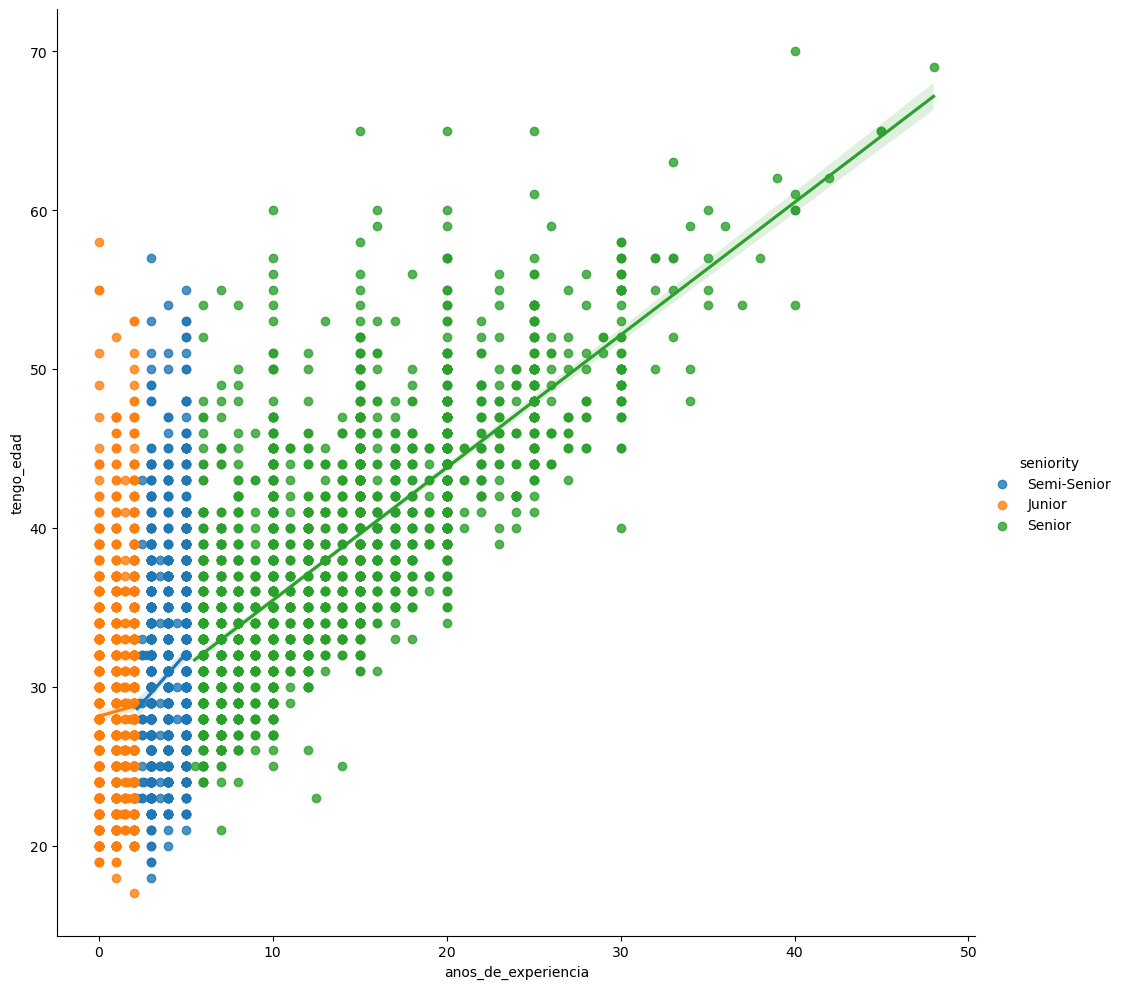

In [15]:
#Paradoja de los simpson
sns.lmplot(
    data=datos,
    x='anos_de_experiencia',
    y='tengo_edad',
    hue='seniority',
    height=10
);

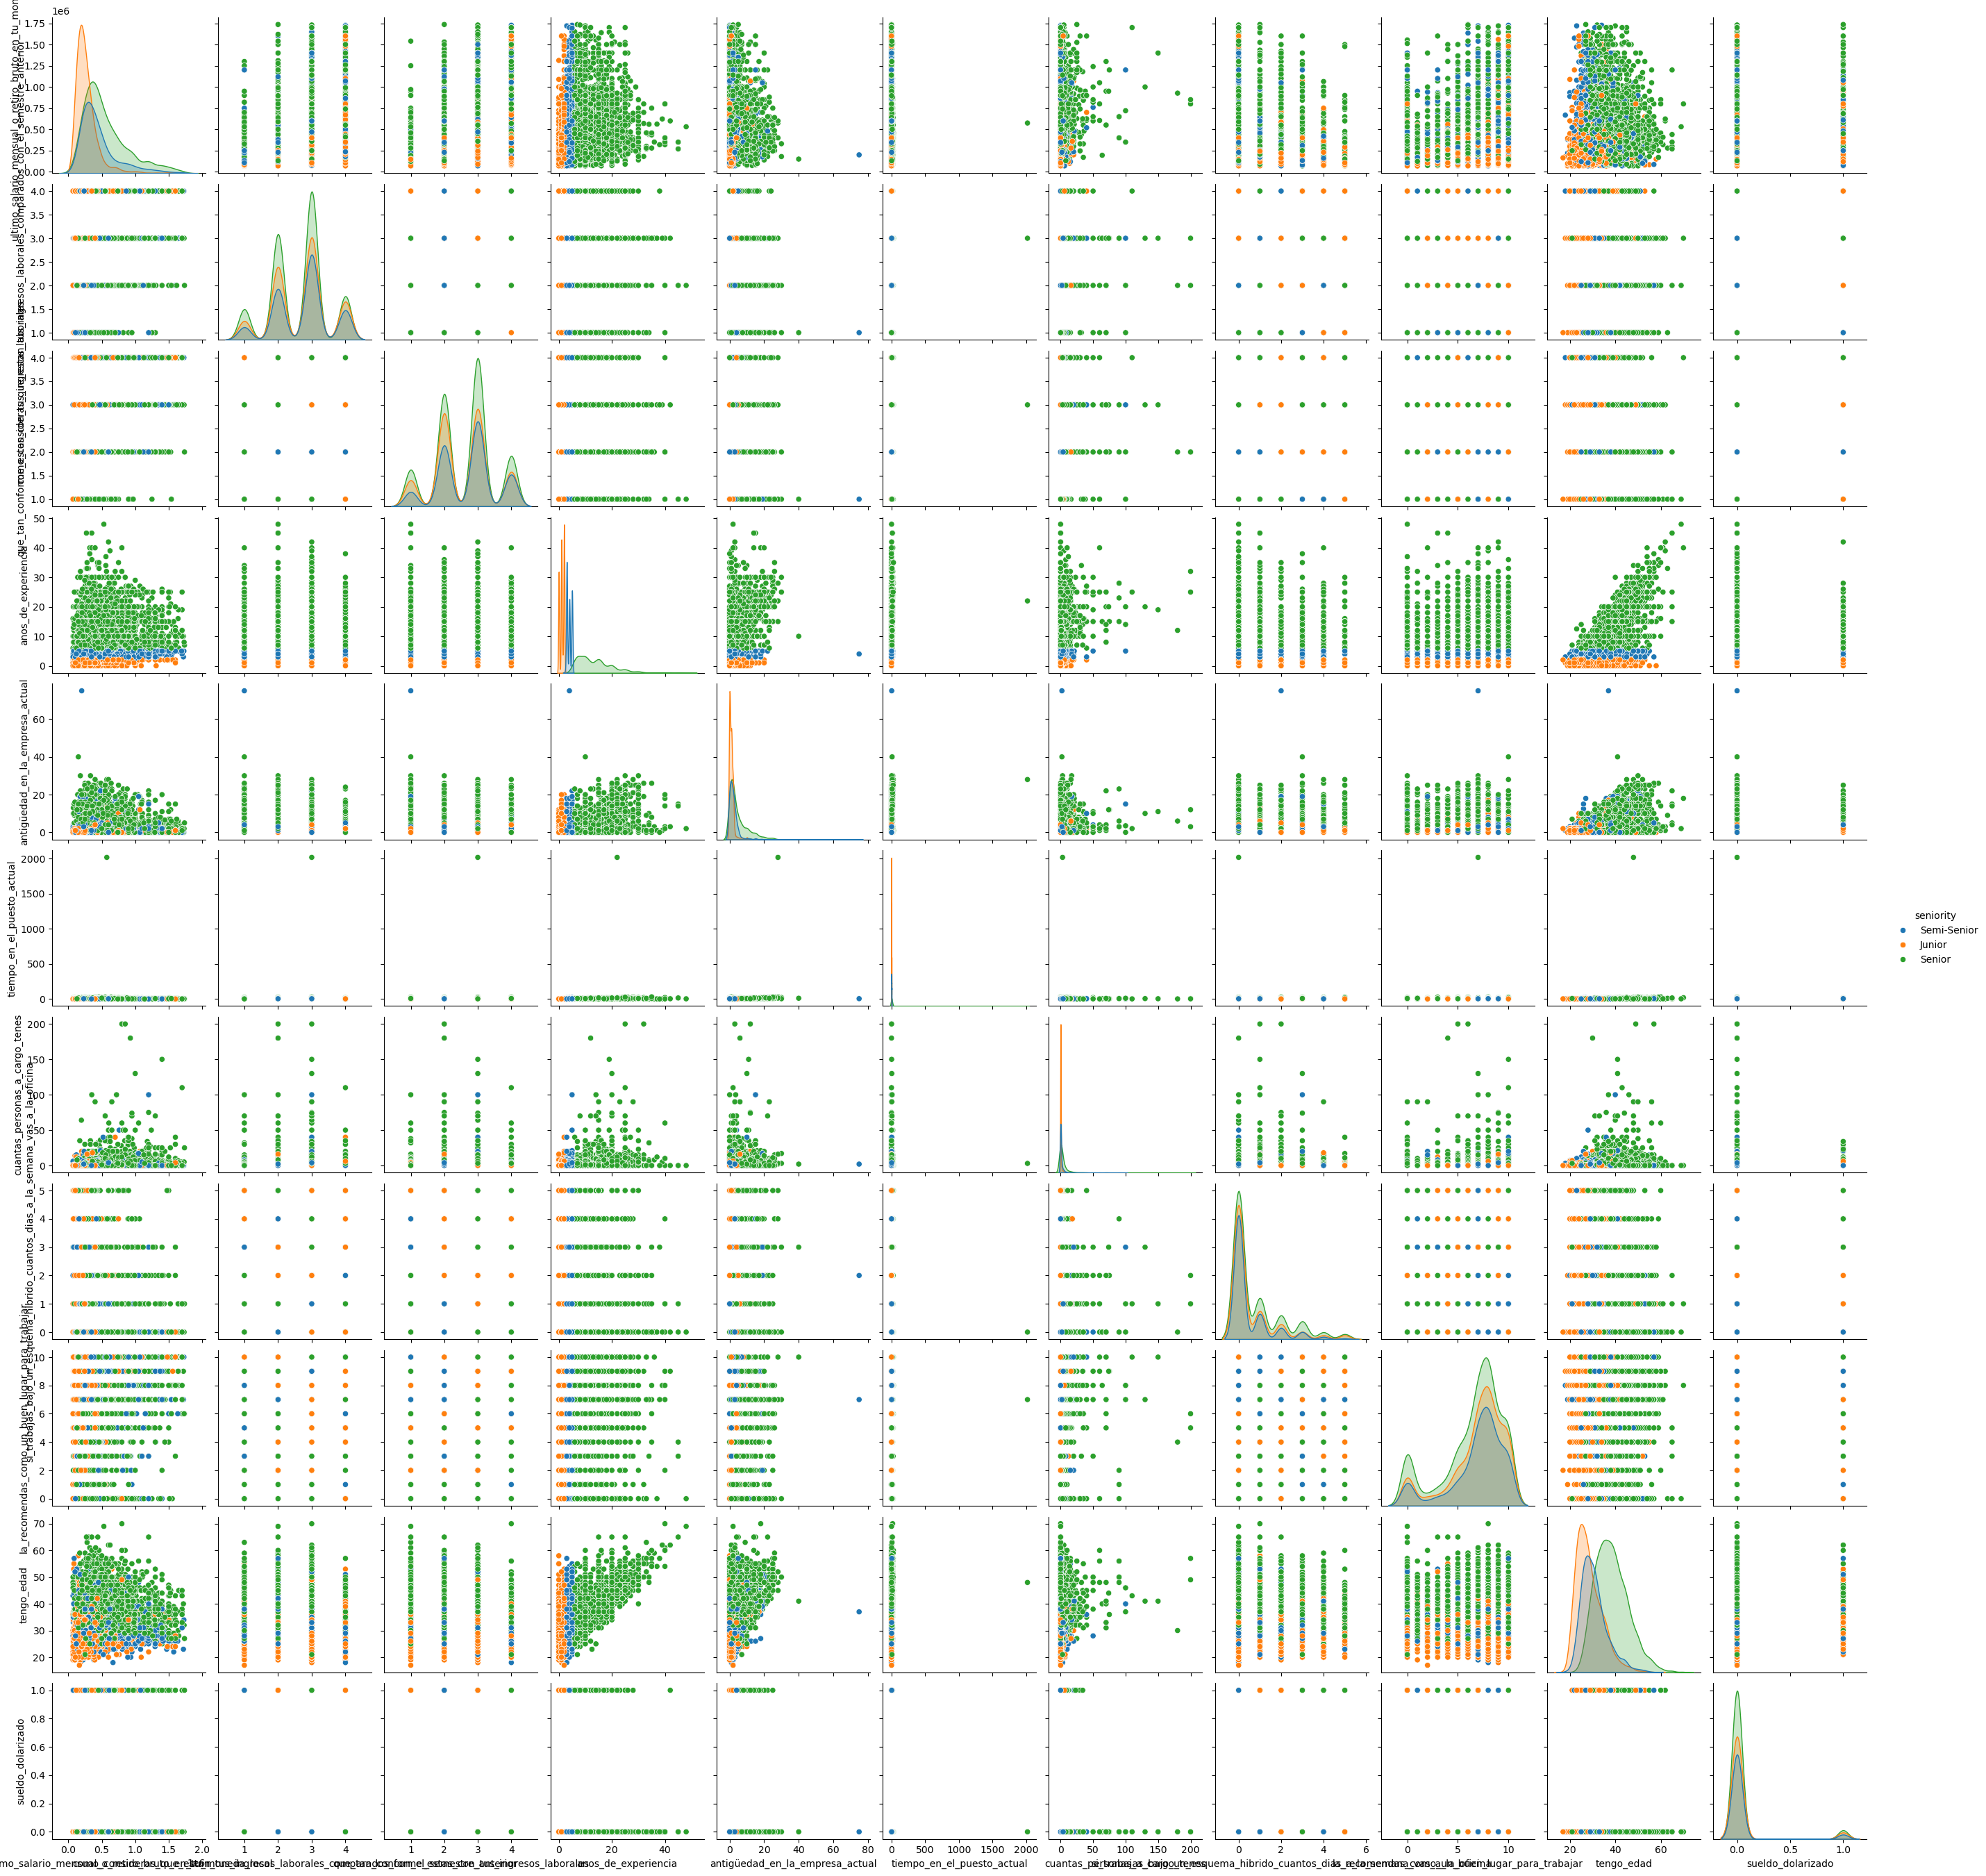

In [16]:
sns.pairplot(
    data=datos,
    hue='seniority'
)